# 딥러닝 파이토치 교과서 CHAP 5

## Fahionmnist

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader

In [6]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [5]:
train_dataset = torchvision.datasets.FashionMNIST(r"C:\Users\dnclab\anaconda3\envs\pytorch\DeepLearning\CHAP5", download=True, transform=transforms.Compose([transforms.ToTensor()]))
test_dataset = torchvision.datasets.FashionMNIST(r"C:\Users\dnclab\anaconda3\envs\pytorch\DeepLearning\CHAP5", download=True, train=False, transform=transforms.Compose([transforms.ToTensor()]))


100.0%

Extracting C:\Users\dnclab\anaconda3\envs\pytorch\DeepLearning\CHAP5\FashionMNIST\raw\train-images-idx3-ubyte.gz to C:\Users\dnclab\anaconda3\envs\pytorch\DeepLearning\CHAP5\FashionMNIST\raw


111.0%

Extracting C:\Users\dnclab\anaconda3\envs\pytorch\DeepLearning\CHAP5\FashionMNIST\raw\train-labels-idx1-ubyte.gz to C:\Users\dnclab\anaconda3\envs\pytorch\DeepLearning\CHAP5\FashionMNIST\raw


100.0%

Extracting C:\Users\dnclab\anaconda3\envs\pytorch\DeepLearning\CHAP5\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to C:\Users\dnclab\anaconda3\envs\pytorch\DeepLearning\CHAP5\FashionMNIST\raw


159.1%

Extracting C:\Users\dnclab\anaconda3\envs\pytorch\DeepLearning\CHAP5\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to C:\Users\dnclab\anaconda3\envs\pytorch\DeepLearning\CHAP5\FashionMNIST\raw
Processing...
Done!


c:\Users\dnclab\anaconda3\envs\pytorch\lib\site-packages\torchvision\datasets\mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [7]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=100)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=100)

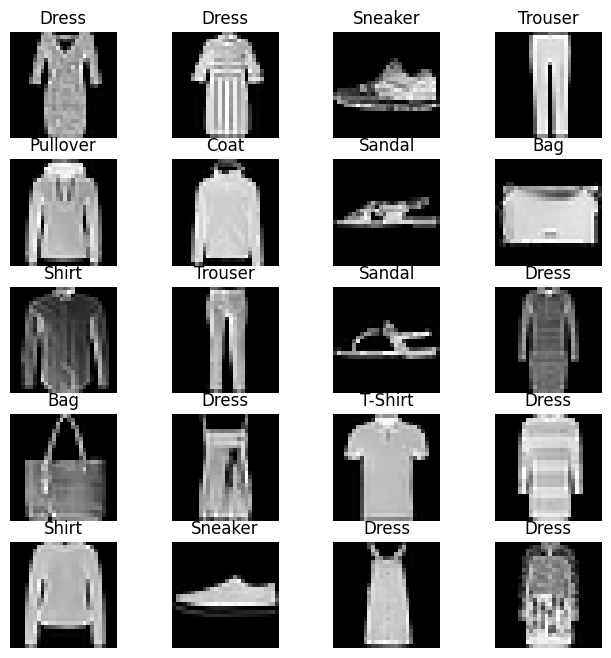

In [18]:
labels_map = {0 : 'T-Shirt', 1 : 'Trouser', 2 : 'Pullover', 3 : 'Dress', 4 : 'Coat', 5 : 'Sandal', 6 : 'Shirt',
              7 : 'Sneaker', 8 : 'Bag', 9 : 'Ankle Boot'}

fig = plt.figure(figsize=(8,8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img_xy = np.random.randint(len(train_dataset))
    img = train_dataset[img_xy][0][0,:,:]
    fig.add_subplot(rows, columns, i)
    plt.title(labels_map[train_dataset[img_xy][1]])
    plt.axis('off')
    plt.imshow(img, cmap='gray')
plt.show()

In [19]:
class FashionDNN(nn.Module):
    def __init__(self):
        super(FashionDNN,self).__init__()
        self.fc1 = nn.Linear(in_features=784,out_features=256)
        self.drop = nn.Dropout2d(0.25)
        self.fc2 = nn.Linear(in_features=256,out_features=128)
        self.fc3 = nn.Linear(in_features=128,out_features=10)

    def forward(self,input_data):
        out = input_data.view(-1, 784)
        out = F.relu(self.fc1(out))
        out = self.drop(out)
        out = F.relu(self.fc2(out))
        out = self.fc3(out)
        return out